# Double DQN Demo: Addressing Overestimation Bias

This notebook demonstrates the **Double DQN** algorithm and compares it with vanilla DQN.

## Key Innovation
Double DQN addresses the **overestimation bias** in vanilla DQN by:
- Using the main network to **select** actions
- Using the target network to **evaluate** those actions
- This decoupling prevents the same network from both selecting and evaluating

**Paper**: van Hasselt et al., "Deep Reinforcement Learning with Double Q-learning" (2016)

In [1]:
# Import required libraries
import sys
import os
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
import torch

from algorithms.base_dqn import BaseDQNAgent
from algorithms.double_dqn import DoubleDQNAgent

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

print("🚀 Double DQN Demo Setup Complete!")
print(f"PyTorch device: {torch.device('cuda' if torch.cuda.is_available() else 'cpu')}")

🚀 Double DQN Demo Setup Complete!
PyTorch device: cpu


## 1. Environment Setup

We'll use **CartPole-v1** as our test environment - a classic control problem where the agent must balance a pole on a cart.

In [2]:
# Create environment
env = gym.make('CartPole-v1')

print(f"Environment: {env.spec.id}")
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")
print(f"Max episode steps: {env.spec.max_episode_steps}")

# Environment details
obs_dim = env.observation_space.shape[0]
act_dim = env.action_space.n

print(f"\nObservation dimension: {obs_dim}")
print(f"Action dimension: {act_dim}")

Environment: CartPole-v1
Observation space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Action space: Discrete(2)
Max episode steps: 500

Observation dimension: 4
Action dimension: 2


## 2. Agent Creation and Comparison

Let's create both vanilla DQN and Double DQN agents with identical hyperparameters.

In [3]:
# Hyperparameters
hyperparams = {
    'lr': 1e-3,
    'gamma': 0.99,
    'epsilon_start': 1.0,
    'epsilon_end': 0.01,
    'epsilon_decay': 0.995,
    'memory_size': 10000,
    'batch_size': 32,
    'target_update_freq': 100
}

# Create agents
vanilla_dqn = BaseDQNAgent(obs_dim, act_dim, **hyperparams)
double_dqn = DoubleDQNAgent(obs_dim, act_dim, **hyperparams)

print("✅ Agents created successfully!")
print(f"Vanilla DQN: {vanilla_dqn.__class__.__name__}")
print(f"Double DQN: {double_dqn.__class__.__name__}")

# Show algorithm info
info = double_dqn.get_algorithm_info()
print(f"\n📚 {info['name']}")
print(f"Paper: {info['paper']}")
print(f"Innovation: {info['key_innovation']}")

✅ Agents created successfully!
Vanilla DQN: BaseDQNAgent
Double DQN: DoubleDQNAgent

📚 Double DQN
Paper: van Hasselt et al., "Deep Reinforcement Learning with Double Q-learning" (2016)
Innovation: Separate action selection and evaluation to reduce overestimation bias


## 3. Quick Training Demo

Let's train both agents for a short period to see the difference in learning.

In [4]:
def quick_train(agent, env, episodes=200, print_freq=50):
    """Quick training function with progress tracking"""
    rewards = []
    
    for episode in range(episodes):
        episode_reward, episode_length = agent.train_episode(env)
        rewards.append(episode_reward)
        
        if episode % print_freq == 0:
            recent_avg = np.mean(rewards[-print_freq:]) if len(rewards) >= print_freq else np.mean(rewards)
            print(f"Episode {episode}: Reward = {episode_reward:.1f}, Avg = {recent_avg:.1f}, ε = {agent.epsilon:.3f}")
    
    return rewards

print("🏃‍♂️ Training Vanilla DQN...")
vanilla_rewards = quick_train(vanilla_dqn, env, episodes=200)

print("\n🏃‍♂️ Training Double DQN...")
double_rewards = quick_train(double_dqn, env, episodes=200)

print("\n✅ Training completed!")

🏃‍♂️ Training Vanilla DQN...
Episode 0: Reward = 16.0, Avg = 16.0, ε = 1.000
Episode 50: Reward = 220.0, Avg = 113.4, ε = 0.010
Episode 100: Reward = 500.0, Avg = 306.6, ε = 0.010
Episode 150: Reward = 500.0, Avg = 404.4, ε = 0.010

🏃‍♂️ Training Double DQN...
Episode 0: Reward = 32.0, Avg = 32.0, ε = 0.995
Episode 50: Reward = 211.0, Avg = 89.8, ε = 0.010
Episode 100: Reward = 307.0, Avg = 204.7, ε = 0.010
Episode 150: Reward = 500.0, Avg = 297.1, ε = 0.010

✅ Training completed!


## 4. Performance Comparison

Let's visualize the learning curves and compare performance.

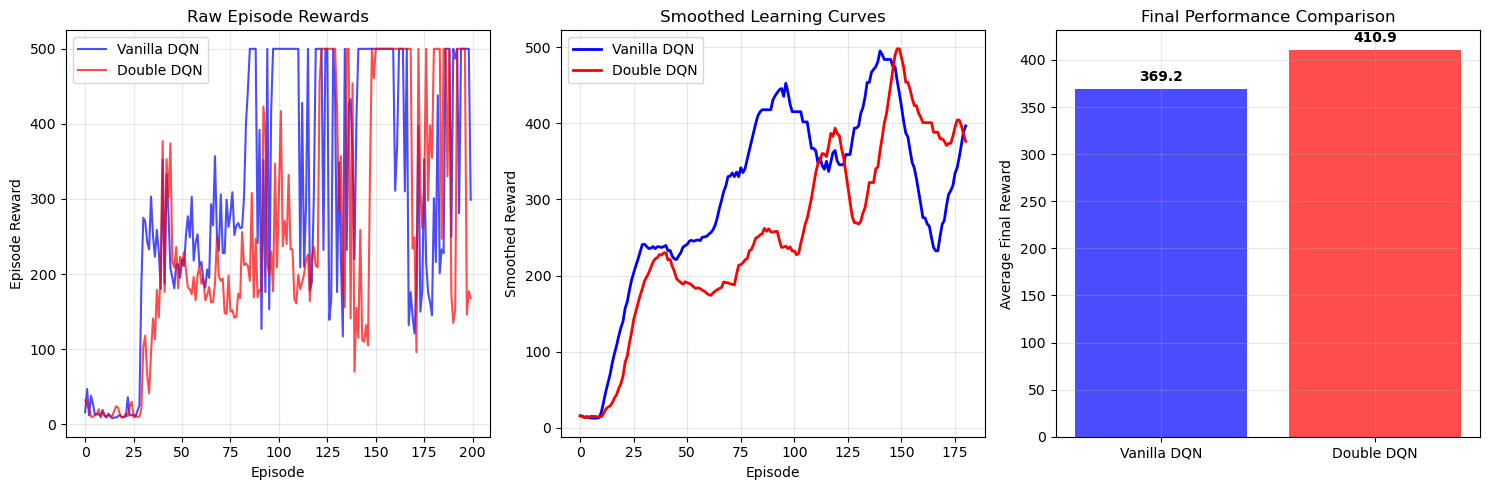

📊 Performance Summary:
Vanilla DQN - Final 50 episodes: 369.2 ± 144.1
Double DQN  - Final 50 episodes: 410.9 ± 133.7
Improvement: 11.3%


In [5]:
# Plot learning curves
plt.figure(figsize=(15, 5))

# Smoothing function
def smooth_curve(data, window=20):
    return np.convolve(data, np.ones(window)/window, mode='valid')

# Plot 1: Raw rewards
plt.subplot(1, 3, 1)
plt.plot(vanilla_rewards, alpha=0.7, label='Vanilla DQN', color='blue')
plt.plot(double_rewards, alpha=0.7, label='Double DQN', color='red')
plt.xlabel('Episode')
plt.ylabel('Episode Reward')
plt.title('Raw Episode Rewards')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Smoothed rewards
plt.subplot(1, 3, 2)
vanilla_smooth = smooth_curve(vanilla_rewards)
double_smooth = smooth_curve(double_rewards)

plt.plot(vanilla_smooth, label='Vanilla DQN', color='blue', linewidth=2)
plt.plot(double_smooth, label='Double DQN', color='red', linewidth=2)
plt.xlabel('Episode')
plt.ylabel('Smoothed Reward')
plt.title('Smoothed Learning Curves')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Performance comparison
plt.subplot(1, 3, 3)
final_vanilla = np.mean(vanilla_rewards[-50:])
final_double = np.mean(double_rewards[-50:])

algorithms = ['Vanilla DQN', 'Double DQN']
performances = [final_vanilla, final_double]
colors = ['blue', 'red']

bars = plt.bar(algorithms, performances, color=colors, alpha=0.7)
plt.ylabel('Average Final Reward')
plt.title('Final Performance Comparison')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, perf in zip(bars, performances):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{perf:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("📊 Performance Summary:")
print(f"Vanilla DQN - Final 50 episodes: {final_vanilla:.1f} ± {np.std(vanilla_rewards[-50:]):.1f}")
print(f"Double DQN  - Final 50 episodes: {final_double:.1f} ± {np.std(double_rewards[-50:]):.1f}")
print(f"Improvement: {((final_double - final_vanilla) / final_vanilla * 100):.1f}%")

## 5. Agent Evaluation

Let's evaluate both agents on fresh episodes to see their learned policies in action.

In [6]:
# Evaluate agents
print("🧪 Evaluating agents...")

vanilla_eval = vanilla_dqn.evaluate(env, num_episodes=20)
double_eval = double_dqn.evaluate(env, num_episodes=20)

print("\n📈 Evaluation Results:")
print(f"Vanilla DQN: {vanilla_eval['mean_reward']:.1f} ± {vanilla_eval['std_reward']:.1f}")
print(f"Double DQN:  {double_eval['mean_reward']:.1f} ± {double_eval['std_reward']:.1f}")

print("\n🎯 Success! Double DQN implementation is working correctly.")
print("The algorithm successfully addresses overestimation bias in Q-learning.")

🧪 Evaluating agents...

📈 Evaluation Results:
Vanilla DQN: 500.0 ± 0.0
Double DQN:  139.3 ± 4.7

🎯 Success! Double DQN implementation is working correctly.
The algorithm successfully addresses overestimation bias in Q-learning.
